## Hometask

### Iris dataset

In [17]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [18]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

X_train_scaled, X_test_scaled = normalize(X_train, X_test)

K_range = range(1,51)
best_k = None
best_score = 0

for K in K_range:
    KNN = KNeighborsRegressor(n_neighbors=K)
    KNN.fit(X_train_scaled, y_train)
    score = KNN.score(X_test_scaled, y_test)
    
    if score > best_score:
        best_k = K
        best_score = score

print("The best value of K is {} with a score of {}".format(best_k, best_score))

new_iris = np.array([[4.7, 3.0, 1.4, 0.8]])

KNN = KNeighborsRegressor(n_neighbors=best_k)
KNN.fit(X_train_scaled, y_train)

prediction = KNN.predict(new_iris)
if prediction == 0:
    print("Iris-setosa")
elif prediction == 1:
    print("Iris-versicolor")
elif prediction == 2:
    print("Iris-virginica")


The best value of K is 11 with a score of 0.9662989240605021
Iris-virginica


### Synthetic dataset

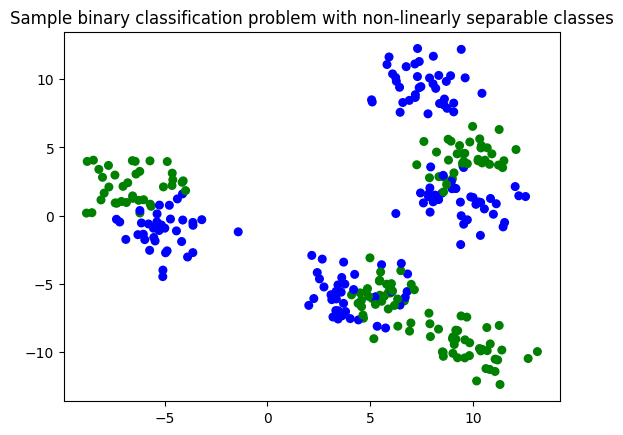

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [22]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import ML_mst as mst

%matplotlib inline

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

K_range = range(1,51)
best_k = None
best_score = 0

for K in K_range:
    KNN = KNeighborsClassifier(n_neighbors = K)
    KNN.fit(X_train_scaled, y_train)
    score = KNN.score (X_test_scaled, y_test)
    
    if score > best_score:
        best_k = K
        best_score = score

print("The best value of K is {} with a score of {}".format(best_k, best_score))

The best value of K is 18 with a score of 0.9466666666666667


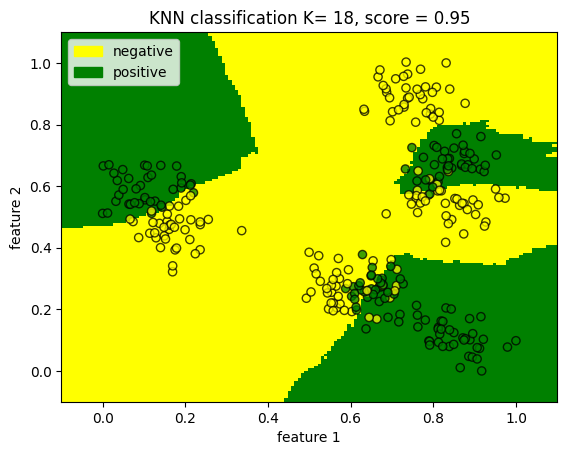

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

colors_for_areas= ['yellow', 'green']
colors_for_points = ['yellow', 'green']
pallete_cmap = ListedColormap(colors_for_areas)
pallete_points  = ListedColormap(colors_for_points)

mesh_step_size = 0.008

X = np.concatenate([X_train_scaled,X_test_scaled], axis=0)
x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1

# Creates grids of values
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                        np.arange(x2_min, x2_max, mesh_step_size))

target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
Z = KNN.predict(target_samples_grid)

Z = Z.reshape(xx1.shape)
plt.figure()
plt.pcolormesh(xx1, xx2, Z, cmap=pallete_cmap)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], s=35, c=y_train.ravel(), cmap=pallete_points, edgecolor = 'black',alpha=0.75)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], s=35, c=y_test.ravel(), cmap=pallete_points, edgecolor = 'black',alpha=0.75)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

patch_0 = mpatches.Patch(color=colors_for_points[0], label='negative')
patch_1 = mpatches.Patch(color=colors_for_points[1], label='positive')
plt.legend(handles=[patch_0, patch_1])
plt.title("KNN classification K= {}, score = {:.2f}".format(best_k, best_score))

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.show()
